In [35]:
import matplotlib as mp
import seaborn as sb
import pandas as pd 
import numpy as np
from numpy import math
from matplotlib import pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import metrics

In [2]:
iris=datasets.load_iris()

In [3]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

df['target']=iris.target

df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

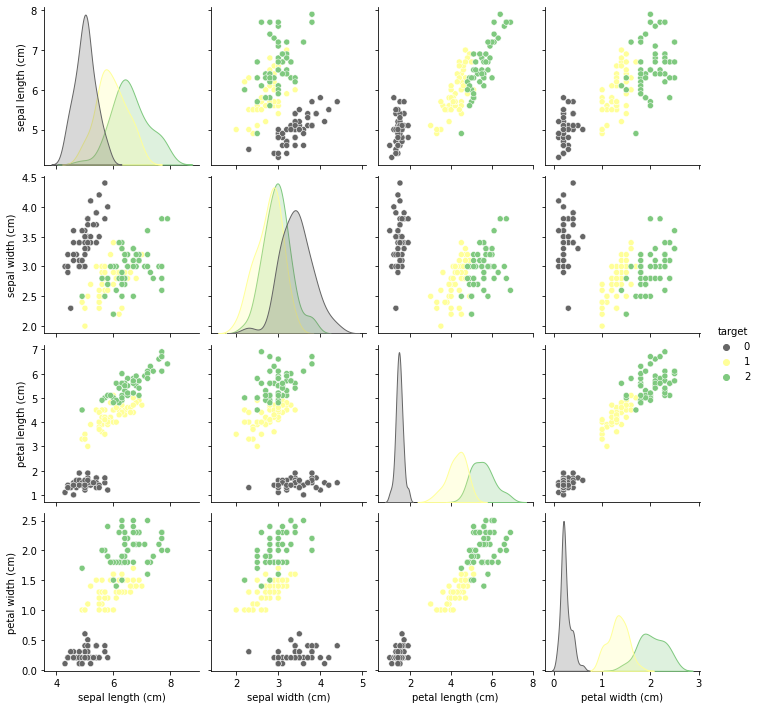

In [6]:
sb.pairplot(df,hue="target",kind="scatter",palette="Accent_r")
plt.show()

In [17]:
X=df.iloc[:,[0,1,2,3]]
y=df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf_dt1=DecisionTreeClassifier(random_state=42,criterion="entropy")
clf_dt1=clf_dt1.fit(x_train,y_train)

In [20]:
plt.figure(figsize=(500,300))
plot_tree(clf_dt1,filled=True,rounded=True,class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],feature_names=X.columns)

[Text(9300.0, 15288.75, 'petal length (cm) <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [35, 39, 38]\nclass = Iris-versicolor'),
 Text(6200.0, 13250.25, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Iris-setosa'),
 Text(12400.0, 13250.25, 'petal length (cm) <= 4.75\nentropy = 1.0\nsamples = 77\nvalue = [0, 39, 38]\nclass = Iris-versicolor'),
 Text(6200.0, 11211.75, 'petal width (cm) <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(3100.0, 9173.25, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(9300.0, 9173.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(18600.0, 11211.75, 'petal length (cm) <= 5.15\nentropy = 0.527\nsamples = 42\nvalue = [0, 5, 37]\nclass = Iris-virginica'),
 Text(15500.0, 9173.25, 'petal width (cm) <= 1.75\nentropy = 0.896\nsamples = 16\nvalue = [0, 5, 11]\nclass = Iris-virginica'),
 Text(9300.0, 7134.75, 'sepal width (cm) <= 2.35\nentrop

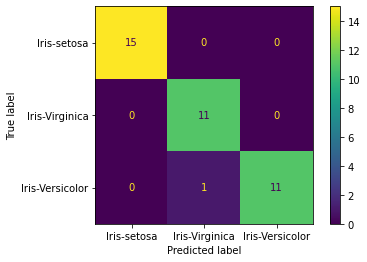

In [21]:
plot_confusion_matrix(clf_dt1,x_test,y_test, display_labels=["Iris-setosa","Iris-Virginica","Iris-Versicolor"])

In [38]:
pred=clf_dt1.predict(x_test)
metrics.classification_report(y_test,y_pred=pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       0.92      1.00      0.96        11\n           2       1.00      0.92      0.96        12\n\n    accuracy                           0.97        38\n   macro avg       0.97      0.97      0.97        38\nweighted avg       0.98      0.97      0.97        38\n'

In [22]:
clf_dt1=DecisionTreeClassifier(random_state=42,criterion="entropy")

<AxesSubplot:xlabel='tree'>

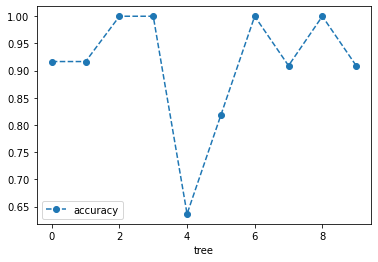

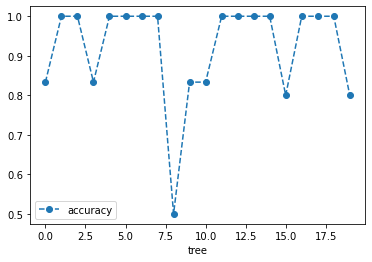

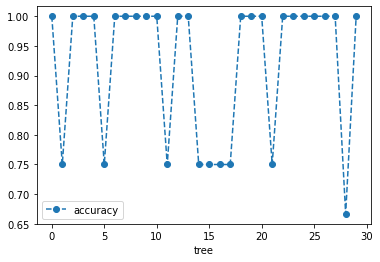

In [26]:
scores=cross_val_score(clf_dt1,x_train,y_train,cv=10)
df=pd.DataFrame(data={'tree':range(10),'accuracy':scores})

scores1=cross_val_score(clf_dt1,x_train,y_train,cv=20)
df1=pd.DataFrame(data={'tree':range(20),'accuracy':scores1})

scores2=cross_val_score(clf_dt1,x_train,y_train,cv=30)
df2=pd.DataFrame(data={'tree':range(30),'accuracy':scores2})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')
df1.plot(x='tree',y='accuracy',marker='o',linestyle='--')
df2.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [27]:
from sklearn import svm
from sklearn import metrics

In [28]:
cls=svm.SVC(kernel="linear")

In [29]:
cls.fit(x_train,y_train)

SVC(kernel='linear')

In [30]:
pred=cls.predict(x_test)

In [31]:
metrics.accuracy_score(y_test,y_pred=pred)

1.0

In [32]:
metrics.classification_report(y_test,y_pred=pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       1.00      1.00      1.00        11\n           2       1.00      1.00      1.00        12\n\n    accuracy                           1.00        38\n   macro avg       1.00      1.00      1.00        38\nweighted avg       1.00      1.00      1.00        38\n'

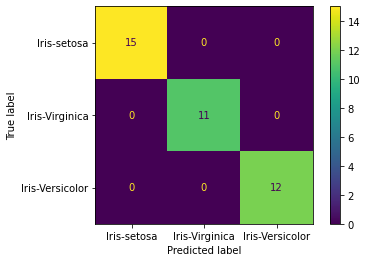

In [34]:
plot_confusion_matrix(cls,x_test,y_test, display_labels=["Iris-setosa","Iris-Virginica","Iris-Versicolor"])

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

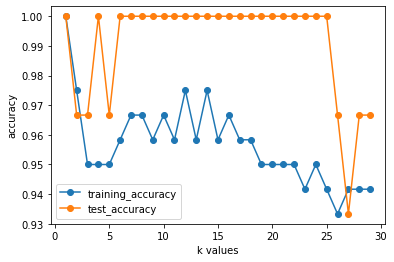

In [41]:
train_accuracy=[]
test_accuracy=[]

neighbors=range(1,30)
for i in range(1,30):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    train_accuracy.append(KNN.score(x_train,y_train))
    test_accuracy.append(KNN.score(x_test,y_test))
    
plt.plot(neighbors,train_accuracy,label="training_accuracy",marker='o')
plt.plot(neighbors,test_accuracy,label="test_accuracy",marker='o')

plt.xlabel("k values")
plt.ylabel("accuracy")
plt.legend()

In [42]:
classifier=KNeighborsClassifier(n_neighbors=27,p=2,metric='euclidean')
classifier.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=27)

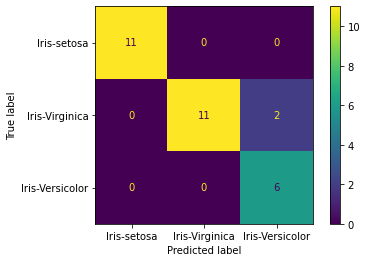

In [43]:
plot_confusion_matrix(classifier,x_test,y_test, display_labels=["Iris-setosa","Iris-Virginica","Iris-Versicolor"])

In [44]:
pred=classifier.predict(x_test)

In [45]:
metrics.classification_report(y_test,y_pred=pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      0.85      0.92        13\n           2       0.75      1.00      0.86         6\n\n    accuracy                           0.93        30\n   macro avg       0.92      0.95      0.92        30\nweighted avg       0.95      0.93      0.94        30\n'

In [49]:
#minimum distance classifier is same as knn with k=1

classifier=KNeighborsClassifier(n_neighbors=1,p=2,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

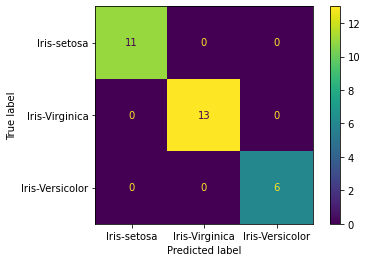

In [50]:
plot_confusion_matrix(classifier,x_test,y_test, display_labels=["Iris-setosa","Iris-Virginica","Iris-Versicolor"])

In [51]:
pred=classifier.predict(x_test)

In [52]:
metrics.classification_report(y_test,y_pred=pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00         6\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'